<a href="https://colab.research.google.com/github/Bhardwaj-Sarthak/Personal-Projects/blob/main/understanding-llms/tutorials/01-introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sheet 1.1: Practical set-up & Training data
========================

**Author**: Polina Tsvilodub


This page contains materials for the first tutorial session.

The learning goals for the first tutorial are:

* preparing the Python requirements for practical exercises in the upcoming tutorials,
* test-running a few lines of code,
* familiarization with a few coding best practices,
* understanding key processing steps and terms of the first building block for training any language model -- the training data.

**Please try to complete the first block of this tutorial sheet (i.e., installation of requirements) AHEAD of the tutorial session**, ideally, while you have a stable internet connection. This way we can try to solve any problems that might have come up with the installation during the tutorial on Friday.

## Installing requirements

Throughout the semester, we will use Python, PyTorch and various packages for practical work. Both the in-tutorial exercise sheets and homework will require you to execute Python code yourself.
Please follow the steps below to set up the requirements (i.e., most packages required for completing exercises) that we will use in the course. We will most likely install more packages as we go during the semester, though.

You can do so either on your own machine, or by using [Google Colab](https://colab.research.google.com/). You can easily access the latter option by pressing the Colab icon at the top of the webook's page. Depending on your choice, please follow the respective requirement installation steps below.

Please note that working with language models is quite compute-intensive. That is, their weight require a lot of disk space, and most importantly, a relatively performant GPU, both for inference and for training. For most purposes of this course, using Colab is the recommended option, unless you have a performant GPU on your laptop. However, there are two additional resources we will take advantage of: [bwJupyter](https://www.bwjupyter.de/), a server provided by the state of Baden-Württemberg, and the API provided by NVIDIA. More on both services below.

### Colab

The advantage of using Colab is that you don't need to install software on your own machine; i.e., it is a safer option if you are not very comfortable with using Python on your own machine. Colab is a  platform provided by Google for free, and it also provides limited access to GPU computation (which will be useful for working with language models). Using it only requires a Google account.

For using a GPU on Colab, before executing your code, navigate to Runtime > Change runtime type > GPU > Save. Please note that the provided Colab computational resources are free, so please be mindful when using them. Further, Colab monitors GPU usage, so if it is used a lot very frequently, the user might not be able to access GPU run times for a while.

Colab already provides Python as well as a number of basic packages. If you choose to use it, you will only need to install the more specific packages. Note that you will have to so *every time* you open a new Colab runtime. To test that you can access requirements for the class, please open this notebook in Colab (see above), uncomment and run the following line:

In [4]:
!pip install torch transformers datasets langchain-community langchain_nvidia_ai_endpoints==0.3.9 python-dotenv==1.1.0 torchrl llama-index bertviz wikipedia

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 84.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 64.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 94.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 45.4 MB/s eta 0:00:00
   

Alternatively, if you want, you can also download the requirements file [here](https://github.com/CogSciPrag/Understanding-LLMs-course/tree/main/understanding-llms/tutorials/files/requirements.txt) and install from it by running `!pip install -r requirements.txt`.

### Local installation

Using your computer for local execution of all practical exercises might be a more advanced option. If you do so, we strongly encourage you to create an environment (e.g., with Conda) before installing any packages. Furthermore, ideally, check if you have a GPU suitable for deep learning because using a GPU will significantly speed up the work with language models. You can do so by checking your computer specs and finding out whether your GPU works with CUDA, MPS or ROCm. If you don't have a suitable GPU, you can use Colab for tasks that require GPU access. Finally, please note that we will download some pretrained models and some datasets which will occupy some of your local storage.

If you choose to use your own machine, please do the following steps:
* install Python >= 3.10
* create an environment (optional but recommended)
* download the requirements file [here](https://github.com/CogSciPrag/Understanding-LLMs-course/tree/main/understanding-llms/tutorials/files/requirements.txt)
* if you have a deep learning supporting GPU:
  * please check [here](https://pytorch.org/get-started/locally/) which PyTorch version you need in order to use the GPU
  * please modify the first line of the requirements file to reflect the PyTorch version suitable for your machine (if needed)
  * please install the requirements from the requirements file (e.g., run: `pip install -r requirements.txt` once pip is available in your environment; adjust path to file if needed)
* if you do NOT have a deep learning supporting GPU:
  * please install the requirements from the requirements file (e.g., run: `pip install -r requirements.txt` once pip is available in your environment; adjust path to file if needed)

### bwJupyter

This is a compute service provided by the state of Baden-Württemberg, specifically for educational purposes. It hosts a Jupyter Notebook server and also provides access to GPUs, as documented [here](https://www.bwjupyter.de/english/65.php). However, the available resources are very limited: only 2GB drive space and 8GB RAM per user. Although the available GPUs are large, there seems to be a cap of 6GB vRAM (GPU memory) per user. Therefore, we might only make use of this service for selected purposes.

Nevertheless, please try accessing the server with your **uni email** [here](https://hub.bwjupyter.de/hub/login?next=%2Fhub%2F). We will need it later in the course.

### NVIDIA API

NVIDIA hosts an API that provides to many state-of-the-art LLMs. This means, NVIDIA servers host these LLMs, and we can retrieve predictions from these models (i.e., *run inference* on them) by submitting an input to the API, without having to download the weights and run the entire LLM ourselves. The API can be accessed by signing up for an account. However, there are also limitations when using an API; for instance, we cannot access the internal model representations or conditional probabilities, or train the models. Therefore, we will make use of the API in later sessions which rather rely on prompting.
Detailed instructions on how to sign up and use the API can be found [here](https://maxschmaltz.github.io//Course-LLM-based-Assistants/infos/llm_inference_guide/README.html).

## Verifying requirement installation

Please run the following code cells to make sure that the key requirements were installed successfully. If errors occur and you cannot solve them ahead of the tutorial, please don't be shy and let us know in the first tutorial!

In [5]:
# import packages

import torch
from transformers import AutoTokenizer
from langchain.tools import WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper

In [7]:
# check available computation device
# if you have a local GPU or if you are using a GPU on Colab, the following code should return "CUDA"
# if you are on Mac and have an > M1 chip, the following code should return "MPS"
# otherwise, it should return "CPU"

if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f"Device: {device}")
elif torch.backends.mps.is_available():
    device = torch.device("mps")
    print(f"Device: {device}")
else:
    device = torch.device("cpu")
    print(f"Device: {device}")

Device: cuda


In [8]:
# test PyTorch

# randomly initialize a tensor of shape (5, 3)
x = torch.rand(5, 3).to(device)
print(x)
print("Shape of tensor x:", x.shape)
print("Device of tensor x:", x.device)

# initialize a tensor of shape (5, 3) with ones
y = torch.ones(5, 3).to(device)
print(y)

# multiply x and y in a pointwise manner
z = x * y
print(z)

# note that to do a matrix multiplication between x and y, we need to transpose
# either matrix x or y because the inner dimensions must match
z1 = x @ y.T
print(z1)

# or:
z2 = x.T @ y
print(z2)
# and note that the result of z1 and z2 are not the same and have different shapes

tensor([[0.8781, 0.6858, 0.7648],
        [0.4047, 0.7285, 0.5694],
        [0.6843, 0.1750, 0.8010],
        [0.3607, 0.9169, 0.3570],
        [0.8418, 0.7032, 0.7184]], device='cuda:0')
Shape of tensor x: torch.Size([5, 3])
Device of tensor x: cuda:0
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], device='cuda:0')
tensor([[0.8781, 0.6858, 0.7648],
        [0.4047, 0.7285, 0.5694],
        [0.6843, 0.1750, 0.8010],
        [0.3607, 0.9169, 0.3570],
        [0.8418, 0.7032, 0.7184]], device='cuda:0')
tensor([[2.3287, 2.3287, 2.3287, 2.3287, 2.3287],
        [1.7027, 1.7027, 1.7027, 1.7027, 1.7027],
        [1.6603, 1.6603, 1.6603, 1.6603, 1.6603],
        [1.6346, 1.6346, 1.6346, 1.6346, 1.6346],
        [2.2634, 2.2634, 2.2634, 2.2634, 2.2634]], device='cuda:0')
tensor([[3.1697, 3.1697, 3.1697],
        [3.2094, 3.2094, 3.2094],
        [3.2106, 3.2106, 3.2106]], device='cuda:0')


In [9]:
# testing LangChain

# run a Wikipedia query, searching for the article "Attention is all you need"
# NB: requires an internet connection
wikipedia = WikipediaQueryRun(api_wrapper=WikipediaAPIWrapper())
wikipedia.run("Attention is all you need")

'Page: Attention Is All You Need\nSummary: "Attention Is All You Need" is a 2017 landmark research paper in machine learning authored by eight scientists working at Google. The paper introduced a new deep learning architecture known as the transformer, based on the attention mechanism proposed in 2014 by Bahdanau et al. It is considered a foundational paper in modern artificial intelligence, and a main contributor to the AI boom, as the transformer approach has become the main architecture of a wide variety of AI, such as large language models. At the time, the focus of the research was on improving Seq2seq techniques for machine translation, but the authors go further in the paper, foreseeing the technique\'s potential for other tasks like question answering and what is now known as multimodal Generative AI.\nThe paper\'s title is a reference to the song "All You Need Is Love" by the Beatles. The name "Transformer" was picked because Jakob Uszkoreit, one of the paper\'s authors, liked

In [10]:
# testing the package transformers which provides pre-trained language models
# and excellent infrastructure around them

# download (if not available yet) and load GPT-2 tokenizer
tokenizer_gpt2 = AutoTokenizer.from_pretrained("gpt2")
text = "Attention is all you need"
# tokenize the text (i.e., convert the string into a tensor of token IDs)
input_ids = tokenizer_gpt2(
    text,
    return_tensors="pt",
).to(device)

print("Input IDs:", input_ids)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Input IDs: {'input_ids': tensor([[8086, 1463,  318,  477,  345,  761]], device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1]], device='cuda:0')}


## Best practices for writing code

There is a lot of debate around best practices for writing, documenting and formatting Python code and their actual implementation in daily practice, and many people have different personal preferences. We are not committing to a particular side in this debate, but we do care about a few general aspects:
* working with clean code
* working with understandable code (i.e., commented, with understandable variable names etc)
* producing well-documented projects (e.g., supplied with relevant READMEs etc). Think: your work should be structured such that you could look at it in a year and be able to immediately know what you did, how and why.

There are a few de facto standard *formatting* practices that help to keep Python code crisp and clean. Please take a look at these and adhere to these as much as you can (as so will we):
* [PEP8](https://pep8.org/): style guide for Python code defining e.g., variable naming conventions, how many spaces to use for indentation, how long single lines should be etc.
  * Here is an overview [video](https://www.youtube.com/watch?v=D4_s3q038I0) of some of the PEP8 conventions
  * There is handy software that reformats your code for you according to some of these conventions. Such software is often seamlessly integrated in IDEs. This includes for instance *Black* or *Ruff* Python formatters. They can be installed as extensions in, e.g., Visual Studio Code.
* *docstrings* are comments (strings) that document a specific code object and always directly follow the definition of the object (e.g., directly after `def fct(...)`). They specify the functionality, inputs, outputs and their types. Again, there are slightly different formatting styles for docstrings; please try to be consistent about your formatting.
  * One example style of docstrings is [*numpydoc*](https://numpydoc.readthedocs.io/en/latest/format.html#docstring-standard); you might see that the provided code might often use such docstrings.

In [11]:
# example: bad formatting
def add(a,b):
    return a+b

# example: better formatting
def add(a, b):
    return a + b

# example: bad docstring

def add(a, b):
    """a+b"""
    return a + b

# example: better docstring
def add(a, b):
    """
    Add two numbers.

    Args
    ----
    a: int
        First number.
    b: int
        Second number.

    Returns
    -------
    int: Sum of a and b.
    """
    return a + b

There are also some hints regarding structuring larger projects and e.g. GitHub repositories (just fyi):

* [project structure](https://djnavarro.net/slides-project-structure/#1)
* [writing good READMEs](https://www.freecodecamp.org/news/how-to-write-a-good-readme-file/)
* [tidy collaboration and git](https://vimeo.com/412835411)

These best practices will be useful to you beyond this class and possibly even beyond your studies when collaborating on other coding projects within teams or even by yourself. We do our best to stick to these guidelines ourselves and kindly urge you to do the same when submitting assignments and possibly projects.

## Understanding training data

One of the critical building blocks of any language model (be it an n-gram model or GPT-4) is the **training data**. The contents of the training data determine, for instance, which tokens (e.g., words) the model "sees" during training, how often each of them occurs, which language the model learns, but also which potential *biases* the model might inherit (more on this in lecture 9).

The goals of this part of the sheet are:
* introduce core terms and concepts that we might be using throughout the class, and that are often used in NLP papers
* understand core data processing steps used before training LMs
* try hands-on loading a dataset and performing basic preprocessing steps

Tasks:
* read the sections below, try to understand each concept and ask yourself whether you have already heard it, and if so, in which context
* complete the exercises
* complete the coding exercises where you can load and process a dataset yourself.

### Core concepts

* **(training) data / dataset** (in the context of LMs): a collection of text data which is used as input to the LM in order to optimize its parameters, so that, ideally, the model learns to perform well on its target task; that is, to predict fluent text. Anything from a single sentence to a book can be considered data; but since learning statistics of natural language is very difficult, usually very large collections of texts (i.e., very large datasets) are used to train LMs. Generalization to other machine learning models: the type of input data might be different (e.g., images and labels for image classification models) but the purpose is the same. Data and dataset are mostly used interchangeably.
  * **corpus** [ling.]: "A corpus is a collection of pieces of language text in electronic form, selected according to external criteria to represent, as far as possible, a language or language variety as a source of data for linguistic research." [source](https://user.phil.hhu.de/~bontcheva/SS10CTCL/CTCL-IntroNotes.pdf) For the purposes of NLP, the term corpus is often used interchangeably with the term dataset, especially when referring to collections of literary texts (e.g., the Books corpus) or when sourced from corpora created in linguistics.
    * well-known linguistic corpora are, e.g.: the [Brown corpus](http://icame.uib.no/brown/bcm.html), the British National Corpus [BNC](http://www.natcorp.ox.ac.uk/).
  * **test / validation data** (general ML concept): the full dataset is sually split into the *training data* (used to optimize the model), and the held-out *validation data* and *test data* (called dataset splits). Validation data is often used to optimize aspects of the model architecture (so-called hyperparameters like optimizer, drop out rate etc). This split is sometimes ommited if no hyperparameter tuning is done. Test data is then used to assess the model's performance on *unseen* data. That is, it is used to approximately answer the question: How well will my trained model perform on completely new inputs? In the context of LMs, all dataset splits are texts.
* **cleaning & preprocessing**: this is the step when "raw" data (e.g., from the web) is processed so as to massage the data into a format that is optimal for the NLP task which we want to accomplish. This can include, for instance, removing markup tags, lower-casing data, splitting it into single sentences etc.
* **annotation**: this step refers to enriching "raw" data with additional information like judgements about the quality of data, "gold standard" demonstrations of a task (e.g., gold standard answer to a question) etc, usually provided by humans. This is done generate high-quality training datasets which cannot be obtained otherwise.
  * most prominently, human annotation is often used in the process of fine-tuning LLMs with RLHF (more on this in lecture 5).
* **token**: minimal unit of text which is mapped onto a numerical representation to be readable for the LM. Different types of tokens have been used: single words, single characters, and recently mostly sub-word parts (and most most recently some experiments with tokens that are large multi-word chunks). Note that unique minimal units are assigned different tokens; whenever such a unit occurs in a particular context, the same numerical representation (i.e., token ID) is assigned to that unit. Therefore, the notion of a token in NLP is not completely equivalent to the notion in lingusitics (and there are no types in NLP as opposed to linguistics).  
  * tokenization is the process of converting a string to a list or tensor of tokens.
  * part of tokenization for training transformers is also creating *attention masks* which "mask" certain tokens for the model (i.e., hide it from the model during training). This is done to train models to predict next words based only on preceding context.
  * tokenization will be discussed in more detail in the session of week 3.
* **vocabulary**: the set of unique tokens used by a particular LM-tookenizer pair. For example, in case of the Llama-2 model, the vocabulary consists of ~32 000 tokens.
* **embedding**: a vector representation of a single token (e.g., word2vec). These vector representations are learned in a way optimizing the next token prediction task and, intuitively, can be understood as approximating (some aspects of) the meaning of a word.
* **batch**: a set of input samples (i.e., texts) that is passed through the LM during training simultaneously, in parallel, during one training step, before updating the internal model parameters. The **batch size** refers to the number of input samples in the set. The batch size is a common hyperparameter of the LM architectures and might have a significant effect on set-up requirements (a large batch size requires a lot of memory) and the model performance (because model parameters are updated based on the training signal from the entire batch).
* **epoch**: an interation over the entire training dataset. Often a model is trained for several epochs, i.e., training iterates over the training set several times.

We will likely extend this list and learn about more important aspects as we go on with the class, but this should already equip you with a good foundation for understanding the parts of the LM literature related to data.

### Main training data processing steps

Before beginning to train the LM, the following steps are commonly completed:

1. acquiring the training data: this step involves downloading or collecting the data of your choice onto the machine which will be used for training. Nowadays many datasets for various tasks can be downloaded from [HuggingFace](https://huggingface.co/datasets) or are made available in GitHub repositories.
2. exploring and understanding the dataset: it is important to understand what kinds of texts, from which sources, on which topics, with what sentence length, ... the dataset contains. This is crucial because the model will pick up on features of the dataset in a way that might be difficult to fully anticipate (which is good if the features are, e.g., gramamticality of sentences, but bad if it is toxic language).
3. creating the desired combination: nowadays training datasets might consist of a mix of different smaller datasets. See the exercise below for more details.
4. cleaning: this step involves filtering out or converting non-machine readable or undesired characters, often lower-casing, removal of punctuation or digits or so-called stop-words (very common words like "a", "and"). However, the last three steps are not very common any more for state-of-the-art LLM training.
   * Specifically, the last cleaning steps have been introduced for tasks like, e.g., sentiment classification. Arguably, stopwords and punctuation etc probably don't contribute much task-relevant information, but might rather introduce encoding difficulties. On the other hand, for natural language generation, punctuation, all words as well as other symbols like emojis carry valuable information. Therefore, such preprocessing is not common for LM training.
5. splitting the dataset into train, validation, test splits
6. prepairing the training split: training texts are often shuffled and sometimes split into shorter texts. Specifically, splitting is required if the length of a text exceeds the maximal *context window size* of the transformer model (i.e., the maximal number of tokens a model can process). In this case, texts are often split into shorter slightly overlapping chunks.
7. tokenizing: converting the single texts into lists of tokens, i.e., into lists of numerical IDs. More on tokenization in the session of week 3.
8. batching: to speed up training, the model is often fed multiple texts at the same time (i.e., at each training step). To create these batches, often additional steps are needed to ensure that several tokenized texts (i.e., several lists with token IDs) can be represented as one input tensor. These steps are either restricting texts to a maximal common length (and cutting off the rest) or *padding* all the texts to the same length. More on this in the tokenization session.

[This article](https://www.geeksforgeeks.org/natural-language-processing-nlp-pipeline/) provides a great and more detailed overview of the steps 1-4 and provides insights into traditional approaches (e.g., feature engineering) which are more common for task-specific models than for foundation language models.

> <strong><span style=&ldquo;color:#D83D2B;&rdquo;>Exercise 1.1.: Massaging a Twitter dataset</span></strong>
>
> Below are a few code blocks for implementing some data processing steps on an example dataset of [tweets about financial news](https://huggingface.co/datasets/zeroshot/twitter-financial-news-sentiment), downloaded from HuggingFace. We will use the `datasets` [package](https://huggingface.co/docs/datasets/en/tutorial) to work with the dataset. Originally, the dataset is intended for sentiment classification, but we will just use the tweets from the column "text".
>
> 1. Please go through the code and complete it in slots which say "#### YOUR CODE HERE". Refer to the comments and hints for instructions about what the code is supposed to do. Make sure to try to understand every line!
>
> 2. What is prominent about the dataset? Are the processing steps adequate if you wanted to train a Twitter bot which could write tweets on this data? Specifically, do you think the resulting cleaned sentences are sensible, good training examples to learn to generate text, and, more specifically, tweets?

README.md:   0%|          | 0.00/1.39k [00:00<?, ?B/s]

sent_train.csv:   0%|          | 0.00/859k [00:00<?, ?B/s]

sent_valid.csv:   0%|          | 0.00/217k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/9543 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2388 [00:00<?, ? examples/s]

{'text': ['$BYND - JPMorgan reels in expectations on Beyond Meat https://t.co/bd0xbFGjkT', '$CCL $RCL - Nomura points to bookings weakness at Carnival and Royal Caribbean https://t.co/yGjpT2ReD3', '$CX - Cemex cut at Credit Suisse, J.P. Morgan on weak building outlook https://t.co/KN1g4AWFIb', '$ESS: BTIG Research cuts to Neutral https://t.co/MCyfTsXc2N', '$FNKO - Funko slides after Piper Jaffray PT cut https://t.co/z37IJmCQzB'], 'label': [0, 0, 0, 0, 0]}
['text', 'label']
Dataset size: 9543
Average tweet length: [12.17835062349366]


Text(0.5, 0, 'Tweet length')

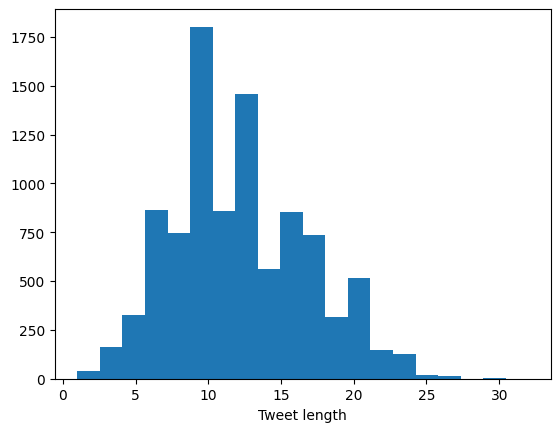

In [12]:
from datasets import load_dataset
import matplotlib.pyplot as plt

# 1. load dataset, only training split
dataset = load_dataset(
    "zeroshot/twitter-financial-news-sentiment",
    split="train",
)

# 2. understand dataset
# print first 5 examples
print(dataset[:5])

# print the columns of the dataset
print(dataset.column_names)

# get the number of examples in the dataset
dataset_size = len(dataset)### YOUR CODE HERE ###
print(f"Dataset size: {dataset_size}")

# compute the tweet lengths (in words, i.e., split by whitespace)
# plot them and compute the average tweet length
tweets = dataset["text"]
tweet_lengths = [len(tweet.split()) for tweet in tweets]### YOUR CODE HERE ###
average_tweet_length = [sum(tweet_lengths)/len(tweet_lengths)]### YOUR CODE HERE ###
print(f"Average tweet length: {average_tweet_length}")

# plot a histogram of the tweet lengths
### YOUR CODE HERE ###
plt.hist(tweet_lengths, bins=20)
plt.xlabel("Tweet length")

Click below to see the solution.

/opt/anaconda3/envs/understanding_llms/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


{'text': ['$BYND - JPMorgan reels in expectations on Beyond Meat https://t.co/bd0xbFGjkT', '$CCL $RCL - Nomura points to bookings weakness at Carnival and Royal Caribbean https://t.co/yGjpT2ReD3', '$CX - Cemex cut at Credit Suisse, J.P. Morgan on weak building outlook https://t.co/KN1g4AWFIb', '$ESS: BTIG Research cuts to Neutral https://t.co/MCyfTsXc2N', '$FNKO - Funko slides after Piper Jaffray PT cut https://t.co/z37IJmCQzB'], 'label': [0, 0, 0, 0, 0]}
['text', 'label']
Dataset size: 9543
Average tweet length: 12.17835062349366


Text(0.5, 0, 'Tweet length')

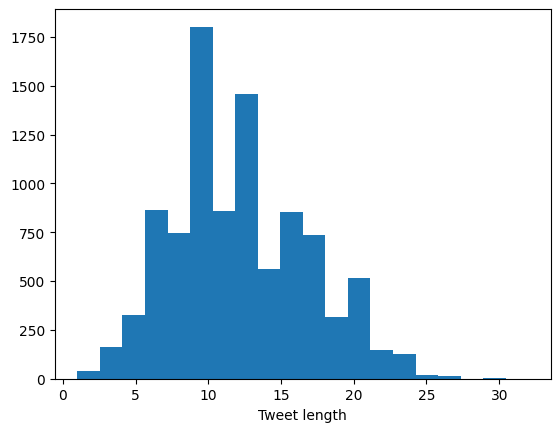

In [ ]:
from datasets import load_dataset
import matplotlib.pyplot as plt

# 1. load dataset, only training split
dataset = load_dataset(
    "zeroshot/twitter-financial-news-sentiment",
    split="train",
)

# 2. understand dataset
# print first 5 examples
print(dataset[:5])

# print the columns of the dataset
print(dataset.column_names)

# get the number of examples in the dataset
dataset_size = len(dataset) ### YOUR CODE HERE ###
print(f"Dataset size: {dataset_size}")

# compute the tweet lengths (in words, i.e., split by whitespace)
# plot them and compute the average tweet length
tweets = dataset["text"]
tweet_lengths = [len(tweet.split()) for tweet in tweets] ### YOUR CODE HERE ###
average_tweet_length = sum(tweet_lengths) / len(tweet_lengths) ### YOUR CODE HERE ###
print(f"Average tweet length: {average_tweet_length}")

# plot the tweet lengths
plt.hist(tweet_lengths, bins=20) ### YOUR CODE HERE ###
plt.xlabel("Tweet length")

```{toggle}
> <strong><span style=&ldquo;color:#D83D2B;&rdquo;>Answers Exercise 1.1.: Massaging a Twitter dataset</span></strong>
>
> 2. The Tweet lenght peaks at 10 tokens, followed by between 10 and 15 tokens. The tweet lenght is almost never larger then 25 tokens. The Average tweet length is 12.17835062349366. This is quite small for tweets.
> So if you would train your Twitter bot with this dataset you would receive a bot that answers in very short sentences. If that is what you are looking for, the dataset would be appropiate.
```

In [13]:
# 4. clean tweets: remove non-alphabetic or non-space characters
# Hint: you can easily google how to remove non-alphabetic characters in Python


def clean_tweet(tweet):
    """
    Remove non-alphabetic or non-space characters from a tweet.

    Args
    ----
    tweet: str
        Tweet to clean.

    Returns
    -------
    cleaned_tweet: str
        Cleaned tweet without non-alphabetic symbols.
    """
    tweet = "".join(
        [char for char in tweet if char.isalpha() or char.isspace()]
        ### YOUR CODE HERE ###
    )
    return tweet

# apply the preprocessing function to all tweets
cleaned_dataset = dataset.map(
    lambda example: {
        "text": clean_tweet(example["text"])
    }
)

# look at a few examples of clean tweets
print(cleaned_dataset[:2])

Map:   0%|          | 0/9543 [00:00<?, ? examples/s]

{'text': ['BYND  JPMorgan reels in expectations on Beyond Meat httpstcobdxbFGjkT', 'CCL RCL  Nomura points to bookings weakness at Carnival and Royal Caribbean httpstcoyGjpTReD'], 'label': [0, 0]}


Click below to see the solution.

In [14]:
# 4. clean tweets: remove non-alphabetic characters
# Hint: you can easily google how to remove non-alphabetic characters in Python


def clean_tweet(tweet):
    """
    Remove non-alphabetic or non-space characters from a tweet.

    Args
    ----
    tweet: str
        Tweet to clean.

    Returns
    -------
    cleaned_tweet: str
        Cleaned tweet without non-alphabetic symbols.
    """
    tweet = "".join(
        [char for char in tweet if char.isalpha() or char.isspace()]
    )  ### YOUR CODE HERE ###
    return tweet

# apply the preprocessing function to all tweets
cleaned_dataset = dataset.map(
    lambda example: {
        "text": clean_tweet(example["text"])
    }
)

# look at a few examples of clean tweets
print(cleaned_dataset[:1])

Map:   0%|          | 0/9543 [00:00<?, ? examples/s]

{'text': ['BYND  JPMorgan reels in expectations on Beyond Meat httpstcobdxbFGjkT'], 'label': [0]}


In [15]:
# 5. split dataset into training and testing set

# select the proportion of the dataset that should be used for training
# and the proportion that should be used for testing
# commonly train : test is around 80:20
train_size = int(0.8 * dataset_size)  ### YOUR CODE HERE ###
test_size = dataset_size - train_size### YOUR CODE HERE ###

print(f"Train size: {train_size}, Test size: {test_size}")

# split the dataset into training and testing set
# this will create two new sub-datasets with the keys "train" and "test"
cleaned_dataset_split = cleaned_dataset.train_test_split(
    test_size=test_size,
)

print("Train split examples: ", cleaned_dataset_split["train"][:3])
print("Test split examples: ", cleaned_dataset_split["test"][:3])

Train size: 7634, Test size: 1909
Train split examples:  {'text': ['Canadian oil shipments are getting snarled once again httpstcoguijPgyAR', 'JCP  One Way JC Penney Can Tackle Its Big Debt Problem Read more and get updates on any stock httpstcobjsVOJuD', 'Indias ECBLike Move to Inject Cash Stokes ShortTerm Bonds'], 'label': [0, 2, 2]}
Test split examples:  {'text': ['ASH  Ashland declares  dividend httpstcobfIwGqZFU', 'Air Transport Services ATSG Outpaces Stock Market Gains What You Should Know  Nasdaq', 'AI is coming for whitecollar jobs as it gets harder better faster stronger httpstcoakvOMfZOm'], 'label': [2, 2, 2]}


Click below to see the solution.

In [ ]:
# 5. split dataset into training and testing set

# select the proportion of the dataset that should be used for training
# and the proportion that should be used for testing
# commonly train : test is around 80:20
train_size = int(0.8 * dataset_size)  ### YOUR CODE HERE ###
test_size = dataset_size - train_size  ### YOUR CODE HERE ###

print(f"Train size: {train_size}, Test size: {test_size}")

# split the dataset into training and testing set
# this will create two new sub-datasets with the keys "train" and "test"
cleaned_dataset_split = cleaned_dataset.train_test_split(
    test_size=test_size,
)

print("Train split examples: ", cleaned_dataset_split["train"][:3])
print("Test split examples: ", cleaned_dataset_split["test"][:3])

Train size: 7634, Test size: 1909
Train split examples:  {'text': ['Aimia gains  after settling with dissident shareholders', 'Walmart hit with wrongfuldeath lawsuit by estate of worker who died of coronavirus httpstcoZzapLmfA', 'LHarris started at buy with  stock price target at Benchmark'], 'label': [1, 0, 1]}
Test split examples:  {'text': ['Rise of the intangibles is pushing down on central bank rates  BoEs Haskel httpstcogYMZyzI httpstcoyFeHVc', 'Wells still bullish on TMobile after unsurprising CEO change', 'Wall Street slips from record highs at open after jobs report'], 'label': [2, 1, 0]}


In [16]:
# 7-8. Tokenize and batch the dataset with wrappers provided by the datasets package
# for tokeinization, we use the GPT-2 tokenizer (more details for what is going on
# under the hood of these wrappers is to come in the next sessions)

from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("gpt2")

def tokenization(example):
    """
    Wrapper around the tokenizer to tokenize the text of an example.

    Args
    ----
    example: dict
        Example tweet from the dataset. Key "text" contains the tweet.

    Returns
    -------
    dict
        Tokenized tweet with token IDs and an attention mask.
    """
    return tokenizer(example["text"]### YOUR CODE HERE ###
        )

# apply the tokenization function to the train dataset
preprocessed_train_dataset = cleaned_dataset_split["train"].map(tokenization, batched=True)

# datasets provides a handy method to format the dataset for training models with PyTorch
# specifically, it makes sure that dataset samples that are loaded from the
# dataset are PyTorch tensors. It also selects columns to be used.
preprocessed_train_dataset.set_format(
    type="torch",
    columns=["input_ids", "attention_mask", "label"]
)

preprocessed_train_dataset.format['type']

Map:   0%|          | 0/7634 [00:00<?, ? examples/s]

'torch'

Click below to see the solution.

In [ ]:
# 7-8. Tokenize and batch the dataset with wrappers provided by the datasets package
# for tokeinization, we use the GPT-2 tokenizer (more details for what is going on
# under the hood of these wrappers is to come in the next sessions)

from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("gpt2")

def tokenization(example):
    """
    Wrapper around the tokenizer to tokenize the text of an example.

    Args
    ----
    example: dict
        Example tweet from the dataset.

    Returns
    -------
    dict
        Tokenized tweet with token IDs and an attention mask.
    """
    return tokenizer(example["text"])

# apply the tokenization function to the train dataset
preprocessed_train_dataset = cleaned_dataset_split["train"].map(tokenization, batched=True)

#
preprocessed_train_dataset.set_format(
    type="torch",
    columns=["input_ids", "attention_mask", "label"]
)
preprocessed_train_dataset.format['type']

Map: 100%|██████████| 7634/7634 [00:00<00:00, 32869.18 examples/s]


'torch'

In [17]:
# finally, to see what the preprocessed dataset looks like
# we iterate over the dataset for a few steps, as we would do in training
# note: usually a DataLoader would be used to iterate over the dataset for training
# we will cover this in the next sessions

for i in range(5):
    print(preprocessed_train_dataset[i])

{'label': tensor(0), 'input_ids': tensor([28203,  3056, 29311,   389,  1972,  3013,   283,   992,  1752,   757,
         2638,   301,    66,   519,    84,  2926,    47,  1360,  1503]), 'attention_mask': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])}
{'label': tensor(2), 'input_ids': tensor([   41,  8697,   220,  1881,  6378, 39408,  7507,  1681,  1680, 43502,
         6363,  4403, 30319, 20647,  4149,   517,   290,   651,  5992,   319,
          597,  4283,  2638,   301,    66,   672,  8457, 29516, 33018,    35]), 'attention_mask': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1])}
{'label': tensor(2), 'input_ids': tensor([ 5497,  4448, 36285,  7594, 10028,   284,   554,   752, 16210,   520,
         3369, 10073, 40596, 39161]), 'attention_mask': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])}
{'label': tensor(1), 'input_ids': tensor([16170, 10885,   481,  1414,  1088,   220,  2997,   284, 12259,  9253,
  

**NOTE**: if you are building your own dataset instead of e.g. loading it via `datasets`, PyTorch provides a class `Dataset` which is easily customizable and essentially allows to explicitly implement functionality that is tucked away in the `datasets` package. Working with it is covered in sheet 2.3 (for next week!).

> <strong><span style=&ldquo;color:#D83D2B;&rdquo;>Exercise 1.2.: Understanding The Pile</span></strong>
>
> To make things more specific, consider [The Pile dataset (Gao et al., 2020)](https://arxiv.org/pdf/2101.00027.pdf). Read trough the abstract and section 1 (Introduction), look at Table 1 (if needed, glimpse at other sections describing what the single names stand for), read section 5.2.
> The following exercises are meant to foster understanding and critical thinking about training datasets. Please try to answer the following questions to yourself:
>
> 1. Which language(s) does The Pile mainly consist of? If an LM is trained on The Pile as it is, how would you expect the LM will perform when completing a text in, e.g., Hungarian?
>
> 2. What is the difference between The Pile and Common Crawl? Why was The Pile introduced?
>
> 3. What does the "epochs" column in Table 1 refer to? What is the idea behind it?
>
> 4. What kind of data is missing from the mix reported in Table 1? What do you think the effect of adding such data would be on an LM trained with the data?

Click below to see the solution.

```{toggle}
<strong><span style=&ldquo;color:#D83D2B;&rdquo;>Answers Exercise 1.2.: Understanding The Pile</span></strong>
>
>1.   The majority of the data is english. Additionally is consists in 14 languages. Nonetheless, the main criteria for multilanguage data was the existence of english data. Therefore Hungarian text completion is probably not possible.
>2.  Common crawl consists in a large amount of raw data, which can result in a poor quality. Because it is favourable to uses a mixtures of many diverse datasets of high quality and from different fields, the Pile was introduced. Furthermore common crawl is part if The Pile changed into PIle-CC while using jusText on Web Archive files for extraction to receive a higher quality.
>3. Epochs are the number of passes over each constituent dataset during a full epoch over the Pile. Therefore smaller datasets can pass the dataset more often the large datasets resulting in a better diversion.
>4. The standard diviation of the document could give inforation whether the dataset has strong outliers. It can give an impression whether the dataset is biased in some way or not.
```

### Dataset documentation

Although datasets are a crucial part of the NLP pipeline, unfortunately, there are very few or no established practices for *documenting* shared datasets or *reporting* the datasets which are used to traing published models. This results in issues of reproducibility of the training because details about the data are unknown, biases of models due to under- or misrepresentation in the data and other issues. This paper (a completely optional read) provides an overview as well as suggestions for improving the situation in the area of machine learning:

[Jo & Gebru (2020). Lessons from Archives: Strategies for Collecting Sociocultural Data in Machine Learning](https://dl.acm.org/doi/pdf/10.1145/3351095.3372829)